# My New Youtube Channel for AI (ML/DL/RL)

https://www.youtube.com/@guardiancoder

#### Please Watch, Like and Subscribe

-----------

# R-CNN (Fast/Faster) -- > YOLO ---> SSD300/500


## SSD is the only object detector capable of achieving -- 
* mAP above 70% 
* while being a 46 fps real-time model


#### This SSD300 model is based on the 
* SSD: Single Shot MultiBox Detector paper, which describes SSD as “a method for detecting objects in images using a single deep neural network”. 
* The input size is fixed to 300x300. 
* The main difference between this model and the one described in the paper is in the backbone.





In [ ]:
Compared to YOLO, SSD can be more accurate but slightly slower.


In [2]:
import cv2

import matplotlib.pyplot as plt

C:\Users\admin\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


====================================

# YOLO 
#### You Only Look Once 

* is an extremely fast multi object detection algorithm which uses convolutional neural network (CNN) to detect and identify objects. 

## Read Here

* https://opencv.org/releases/ 
* https://opencv-tutorial.readthedocs.io/en/latest/yolo/yolo.html

* https://pjreddie.com/darknet/yolo/
* https://github.com/patrick013/Object-Detection---Yolov3/blob/master/model/yolov3.weights


#model = cv2.dnn.readNet(yolo model weights, yolo configs)

#yolov3.weights

In [6]:
model = cv2.dnn.readNet('yolov3.cfg', 'yolov3.weights')
model

< cv2.dnn.Net 0000017676432D90>

In [5]:


net = cv2.dnn.readNetFromDarknet('yolov3.cfg', 'yolov3.weights')

net

< cv2.dnn.Net 00000176748F1A70>

In [7]:
ln = net.getLayerNames()
ln

('conv_0',
 'bn_0',
 'leaky_1',
 'conv_1',
 'bn_1',
 'leaky_2',
 'conv_2',
 'bn_2',
 'leaky_3',
 'conv_3',
 'bn_3',
 'leaky_4',
 'shortcut_4',
 'conv_5',
 'bn_5',
 'leaky_6',
 'conv_6',
 'bn_6',
 'leaky_7',
 'conv_7',
 'bn_7',
 'leaky_8',
 'shortcut_8',
 'conv_9',
 'bn_9',
 'leaky_10',
 'conv_10',
 'bn_10',
 'leaky_11',
 'shortcut_11',
 'conv_12',
 'bn_12',
 'leaky_13',
 'conv_13',
 'bn_13',
 'leaky_14',
 'conv_14',
 'bn_14',
 'leaky_15',
 'shortcut_15',
 'conv_16',
 'bn_16',
 'leaky_17',
 'conv_17',
 'bn_17',
 'leaky_18',
 'shortcut_18',
 'conv_19',
 'bn_19',
 'leaky_20',
 'conv_20',
 'bn_20',
 'leaky_21',
 'shortcut_21',
 'conv_22',
 'bn_22',
 'leaky_23',
 'conv_23',
 'bn_23',
 'leaky_24',
 'shortcut_24',
 'conv_25',
 'bn_25',
 'leaky_26',
 'conv_26',
 'bn_26',
 'leaky_27',
 'shortcut_27',
 'conv_28',
 'bn_28',
 'leaky_29',
 'conv_29',
 'bn_29',
 'leaky_30',
 'shortcut_30',
 'conv_31',
 'bn_31',
 'leaky_32',
 'conv_32',
 'bn_32',
 'leaky_33',
 'shortcut_33',
 'conv_34',
 'bn_34',
 'l

# Look at Original Images

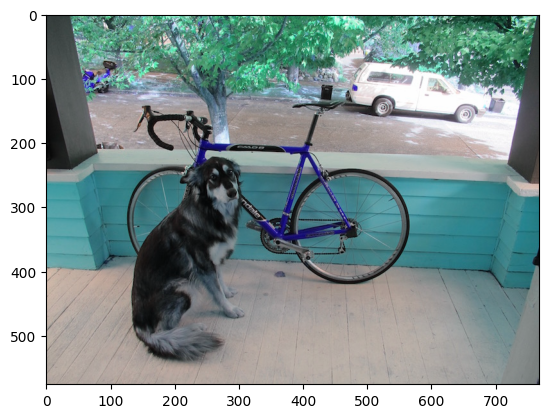

In [16]:
img = cv2.imread("dog_bike_car.jpeg")

plt.imshow(img)

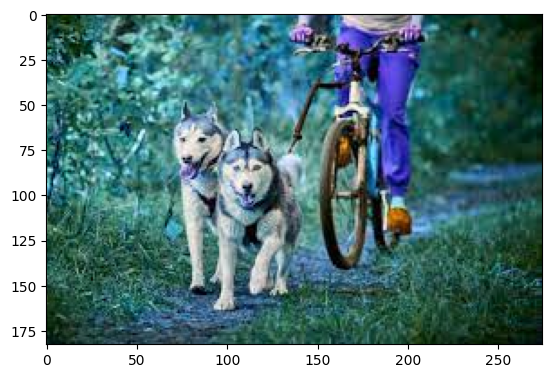

In [150]:
img = cv2.imread("dog_cycle.jpeg")

plt.imshow(img)

In [23]:
#Image Vector

img

array([[[ 50,  58,  57],
        [ 51,  59,  58],
        [ 53,  61,  60],
        ...,
        [ 47,  89, 142],
        [ 41,  50,  88],
        [ 47,  71,  63]],

       [[ 51,  59,  58],
        [ 51,  59,  58],
        [ 52,  60,  59],
        ...,
        [ 37,  74, 124],
        [ 41,  50,  84],
        [ 46,  70,  58]],

       [[ 51,  59,  58],
        [ 51,  59,  58],
        [ 52,  60,  59],
        ...,
        [ 25,  54,  98],
        [ 48,  54,  77],
        [ 43,  62,  45]],

       ...,

       [[179, 168, 160],
        [179, 168, 160],
        [182, 171, 163],
        ...,
        [ 64,  64,  80],
        [ 36,  39,  53],
        [ 48,  53,  62]],

       [[180, 169, 161],
        [179, 168, 160],
        [175, 164, 156],
        ...,
        [ 61,  61,  79],
        [ 37,  40,  54],
        [ 52,  56,  67]],

       [[176, 165, 157],
        [178, 167, 159],
        [172, 161, 153],
        ...,
        [ 62,  62,  80],
        [ 33,  36,  50],
        [ 35,  39,  50]]

## Input image frame settings


In [19]:
blob = cv2.dnn.blobFromImage(img, 1/255.0, (416, 416), swapRB=True, crop=False)

  

The purpose of swapping the Red and Blue channels is to handle differences in color channel ordering between different image sources or datasets. In some cases, different frameworks or image sources may have different conventions for the order of color channels (e.g., RGB or BGR).


By setting ::
* model.setInputSwapRB(True), 
the model expects the input data to have color channels in the BGR order. If the input data is provided in the RGB order, this function will automatically swap the Red and Blue channels to match the expected channel ordering.

In [22]:
blob

array([[[[0.22352943, 0.23529413, 0.2392157 , ..., 0.76470596,
          0.6117647 , 0.28627452],
         [0.227451  , 0.23137257, 0.2392157 , ..., 0.79215693,
          0.5137255 , 0.24705884],
         [0.23137257, 0.23137257, 0.2392157 , ..., 0.79215693,
          0.3803922 , 0.227451  ],
         ...,
         [0.61960787, 0.6392157 , 0.6156863 , ..., 0.50980395,
          0.40784317, 0.24313727],
         [0.627451  , 0.62352943, 0.6039216 , ..., 0.5137255 ,
          0.3529412 , 0.23529413],
         [0.61960787, 0.6       , 0.6117647 , ..., 0.5019608 ,
          0.3529412 , 0.20392159]],

        [[0.227451  , 0.2392157 , 0.24705884, ..., 0.9294118 ,
          0.48235297, 0.24313727],
         [0.23137257, 0.23529413, 0.24313727, ..., 0.9294118 ,
          0.3921569 , 0.23529413],
         [0.23529413, 0.23529413, 0.24313727, ..., 0.8980393 ,
          0.27450982, 0.24313727],
         ...,
         [0.6509804 , 0.67058825, 0.64705884, ..., 0.4784314 ,
          0.34901962, 0.2

================================================

In [20]:
net.setInput(blob)



In [21]:
outputs = net.forward(ln)

outputs

(array([[[[-3.06434870e-01, -2.62661844e-01, -2.77124643e-01, ...,
           -1.01239550e+00, -4.49912339e-01, -2.82500237e-01],
          [-3.05352449e-01, -2.73241788e-01, -2.85722852e-01, ...,
           -1.06777537e+00, -2.88651943e-01, -3.11702520e-01],
          [-3.04585785e-01, -2.73179173e-01, -2.84301966e-01, ...,
           -1.05000114e+00, -2.37387776e-01, -3.37205857e-01],
          ...,
          [-8.76423895e-01, -7.92448342e-01, -7.54279077e-01, ...,
           -6.34256005e-01, -3.68389100e-01, -2.55703509e-01],
          [-8.75315309e-01, -7.47609317e-01, -7.76956201e-01, ...,
           -6.14915907e-01, -3.61873686e-01, -2.22747967e-01],
          [ 8.64174664e-02,  1.59864157e-01,  1.50452182e-01, ...,
            1.10909432e-01,  8.55155736e-02,  4.98712845e-02]],
 
         [[-1.07305229e-01, -1.50647461e-01, -1.58554778e-01, ...,
           -5.28619945e-01, -3.73192668e-01, -2.08418250e-01],
          [-1.96748033e-01, -3.59773546e-01, -3.76988679e-01, ...,
     